### Chargement du dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "ml-100k/u.data"
columns = ["user_id", "movie_id", "rating", "timestamp"]
data = pd.read_csv(data_path, sep="\t", names=columns)
display(data)
data.info()

user_path = "ml-100k/u.user"
columns = ["user_id", "age", "sex", "job","postal_code"]
user = pd.read_csv(user_path, sep="|", names=columns)
display(user)
user.info()

genre_path = "ml-100k/u.genre"
columns = ["genre", "genre_id"]
genre = pd.read_csv(genre_path, sep="|",names=columns, encoding="latin-1")

item_path = "ml-100k/u.item"
columns = ["movie_id", "title", "date", "?","imdb_link"] + genre.sort_values(by="genre_id")["genre"].tolist()
item = pd.read_csv(item_path, sep="|",names=columns, encoding="latin-1")
item=item.drop("?",axis=1)
display(item)
item.info()

ml= pd.merge(left=data,right=item[['movie_id','title']],on='movie_id',how='left')
display(ml)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


,user_id,age,sex,job,postal_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      943 non-null    int64 
 1   age          943 non-null    int64 
 2   sex          943 non-null    object
 3   job          943 non-null    object
 4   postal_code  943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


,movie_id,title,date,imdb_link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     1682 non-null   int64 
 1   title        1682 non-null   object
 2   date         1681 non-null   object
 3   imdb_link    1679 non-null   object
 4   unknown      1682 non-null   int64 
 5   Action       1682 non-null   int64 
 6   Adventure    1682 non-null   int64 
 7   Animation    1682 non-null   int64 
 8   Children's   1682 non-null   int64 
 9   Comedy       1682 non-null   int64 
 10  Crime        1682 non-null   int64 
 11  Documentary  1682 non-null   int64 
 12  Drama        1682 non-null   int64 
 13  Fantasy      1682 non-null   int64 
 14  Film-Noir    1682 non-null   int64 
 15  Horror       1682 non-null   int64 
 16  Musical      1682 non-null   int64 
 17  Mystery      1682 non-null   int64 
 18  Romance      1682 non-null   int64 
 19  Sci-Fi       1682 non-null 

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)


### Analyse

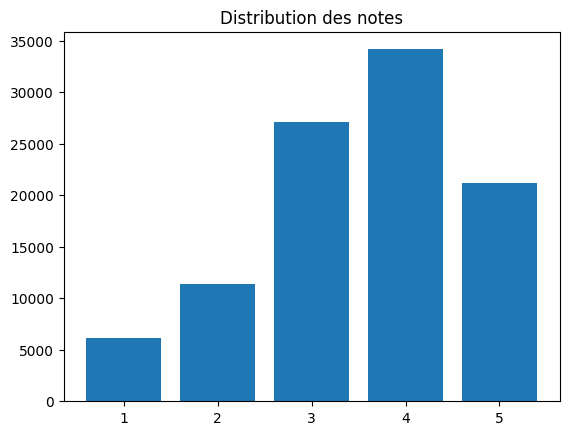

In [2]:
ratings = ml['rating'].value_counts()
plt.bar(ratings.index,ratings)
plt.title("Distribution des notes")
plt.show()

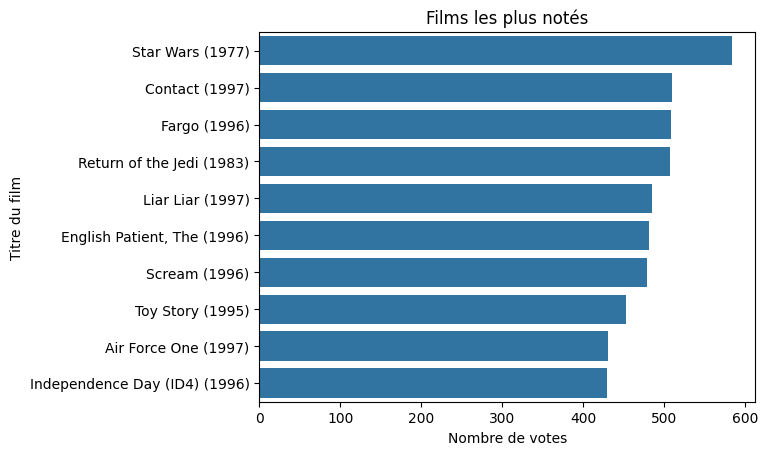

In [3]:
top_votes = ml['title'].value_counts().head(10)
sns.barplot(y=top_votes.index, x=top_votes.values, orient = 'h')
plt.title("Films les plus notés")
plt.xlabel("Nombre de votes")
plt.ylabel("Titre du film")
plt.show()

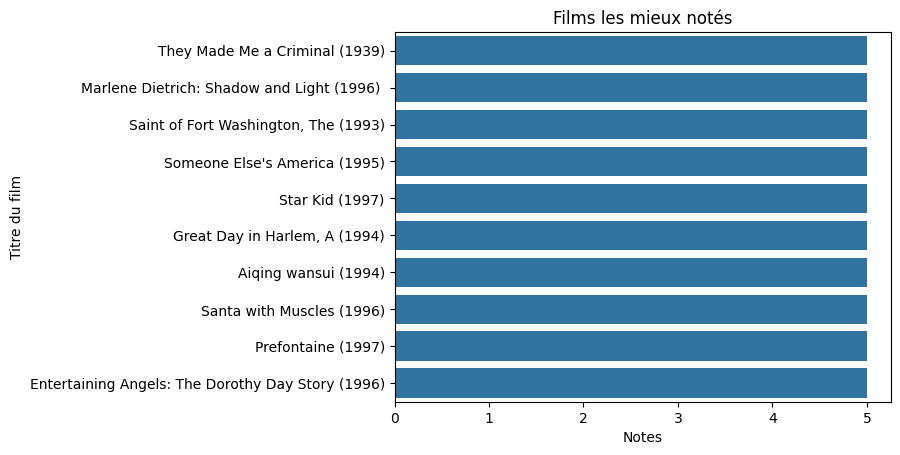

In [4]:
top_ratings = ml.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=top_ratings.index, x=top_ratings.values, orient = 'h')
plt.title("Films les mieux notés")
plt.xlabel("Notes")
plt.ylabel("Titre du film")
plt.show()

,title,count,mean,moy_bay
0,'Til There Was You (1997),9,2.333333,2.980151
1,1-900 (1994),5,2.600000,3.040379
2,101 Dalmatians (1996),109,2.908257,2.968234
3,12 Angry Men (1957),125,4.344000,3.932642
4,187 (1997),41,3.024390,3.055675
...,...,...,...,...
1659,Young Guns II (1990),44,2.772727,2.948399
1660,"Young Poisoner's Handbook, The (1995)",41,3.341463,3.184265
1661,Zeus and Roxanne (1997),6,2.166667,2.994379
1662,unknown,9,3.444444,3.124877


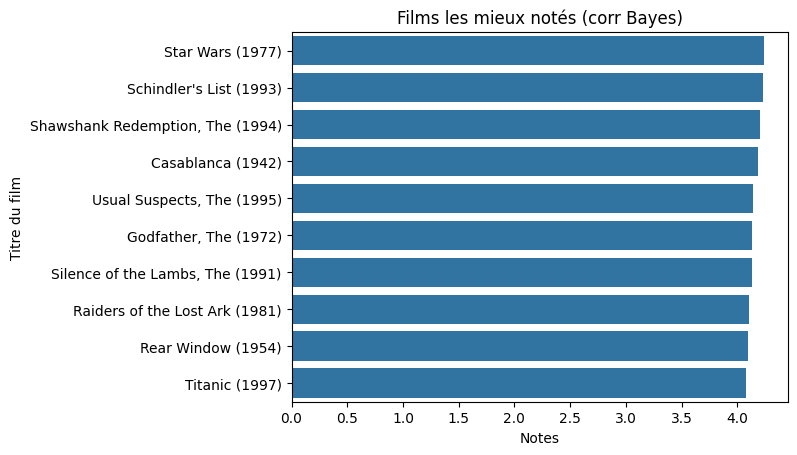

In [5]:
# Moyenne bayesienne par film
def moy_bayesienne(C,M,S,n):
    return((C*M+S)/(C+n))
# C = nombre de notes d'un film, en moyenne
# M = moyenne des notes d'un film, en moyenne
# S = vecteur de la somme des notes, pour chaque film
# n = vecteur du nbre de notes, pour chaque film 

movie_stats = ml.groupby('title')['rating'].agg(['count','mean']).reset_index()
C = movie_stats['count'].mean()
M = movie_stats['mean'].mean()
S = movie_stats['count']*movie_stats['mean']
n = movie_stats['count']

# On ajoute une colonne moyenne bayesienne pour chaque film
movie_stats['moy_bay'] = moy_bayesienne(C,M,S=movie_stats['count']*movie_stats['mean'],n=movie_stats['count'])
display(movie_stats)

top_ratings_bayes = movie_stats.sort_values(by=["moy_bay"],ascending=False).head(10)
sns.barplot(y=top_ratings_bayes['title'], x=top_ratings_bayes['moy_bay'].values, orient = 'h')
plt.title("Films les mieux notés (corr Bayes)")
plt.xlabel("Notes")
plt.ylabel("Titre du film")
plt.show()


### Approche modèle user-user

In [6]:
# Création matrice de notation
mat_ratings = ml.pivot_table(index=ml['user_id'],columns=ml['title'],values='rating')
display(mat_ratings)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# On remplace les valeurs manquantes par 0 
mat_ratings = mat_ratings.fillna(0)

# On crée une sparse Matrix
from scipy.sparse import csr_matrix
sparse_ratings = csr_matrix(mat_ratings)

print(sparse_ratings)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 99693 stored elements and shape (943, 1664)>
  Coords	Values
  (0, 2)	2.0
  (0, 3)	5.0
  (0, 6)	3.0
  (0, 7)	4.0
  (0, 16)	3.0
  (0, 17)	3.0
  (0, 31)	1.0
  (0, 35)	4.0
  (0, 36)	4.0
  (0, 41)	5.0
  (0, 44)	5.0
  (0, 46)	1.0
  (0, 50)	5.0
  (0, 76)	4.0
  (0, 84)	5.0
  (0, 87)	3.0
  (0, 88)	4.0
  (0, 93)	2.0
  (0, 94)	4.0
  (0, 104)	4.0
  (0, 109)	1.0
  (0, 113)	5.0
  (0, 115)	2.0
  (0, 127)	3.0
  (0, 131)	1.0
  :	:
  (942, 1478)	3.0
  (942, 1488)	1.0
  (942, 1495)	5.0
  (942, 1497)	2.0
  (942, 1507)	4.0
  (942, 1513)	4.0
  (942, 1516)	4.0
  (942, 1524)	5.0
  (942, 1525)	4.0
  (942, 1533)	4.0
  (942, 1534)	5.0
  (942, 1537)	4.0
  (942, 1559)	5.0
  (942, 1560)	3.0
  (942, 1572)	5.0
  (942, 1581)	2.0
  (942, 1615)	4.0
  (942, 1632)	2.0
  (942, 1633)	4.0
  (942, 1641)	1.0
  (942, 1644)	3.0
  (942, 1645)	2.0
  (942, 1653)	1.0
  (942, 1658)	4.0
  (942, 1659)	3.0


In [8]:
# On réduit la matrice de notation par le modèle SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=12)
ratings_red = svd.fit_transform(sparse_ratings)
print ("Matrice réduite : ")
print (ratings_red)
print (ratings_red.shape)


Matrice réduite : 
[[ 42.04342223  -1.66497788  -1.50462946 ...   2.03602178   0.379422
    1.03524305]
 [  8.9496141   11.33247633  11.39963436 ...  -0.50931948   6.82371012
   -0.44980573]
 [  3.61892108   6.23996231   5.15625542 ...  -0.69003353  -1.06785666
   -0.64359709]
 ...
 [  4.76958444   6.12977208   1.38472893 ...  -0.1266386   -0.70717409
   -0.76506288]
 [ 15.36537825  -1.96541605   5.04670255 ...  -2.82087239  -2.29880815
   -3.26147505]
 [ 27.07247261   2.76710372 -12.73029814 ...  -3.29151998   5.69317844
   -0.95577886]]
(943, 12)


In [9]:
# On crée la matrice de similarité des utilisateurs à partir de la matrice réduite
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(ratings_red)
df_user_similarity = pd.DataFrame(user_similarity,index=mat_ratings.index.values,columns=mat_ratings.index.values)

display(df_user_similarity)

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,1.000000,0.375556,0.143236,0.275950,0.781525,0.705908,0.738279,0.683802,0.576975,0.723928,...,0.811404,0.285518,0.480158,0.434770,0.377800,0.310591,0.792065,0.502186,0.450904,0.780576
2,0.375556,1.000000,0.561521,0.589123,0.131295,0.416241,0.158463,0.241786,0.781426,0.365405,...,0.296359,0.608989,0.875308,0.916347,0.633307,0.598696,0.612134,0.613013,0.389572,0.218517
3,0.143236,0.561521,1.000000,0.915964,0.025074,0.189214,0.145466,0.193996,0.492363,0.190177,...,0.113582,0.167688,0.407573,0.274005,0.305441,0.099174,0.584685,0.335367,0.519633,0.078727
4,0.275950,0.589123,0.915964,1.000000,0.228635,0.231466,0.215510,0.344990,0.575790,0.227310,...,0.235257,0.318778,0.442899,0.350981,0.473031,0.241939,0.702588,0.517094,0.571133,0.195403
5,0.781525,0.131295,0.025074,0.228635,1.000000,0.443872,0.670925,0.541997,0.391225,0.452488,...,0.801677,0.140299,0.241931,0.191763,0.320636,0.176769,0.572148,0.433446,0.323426,0.597698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.310591,0.598696,0.099174,0.241939,0.176769,0.243821,0.186661,0.161663,0.467421,0.175101,...,0.192031,0.987744,0.732103,0.551759,0.936606,1.000000,0.269598,0.718032,0.219682,0.348992
940,0.792065,0.612134,0.584685,0.702588,0.572148,0.753678,0.630656,0.582832,0.737577,0.733926,...,0.779557,0.312507,0.488501,0.502508,0.385092,0.269598,1.000000,0.479321,0.748692,0.572443
941,0.502186,0.613013,0.335367,0.517094,0.433446,0.319121,0.165156,0.372209,0.623437,0.210901,...,0.245361,0.706282,0.814626,0.613617,0.867680,0.718032,0.479321,1.000000,0.273726,0.309433
942,0.450904,0.389572,0.519633,0.571133,0.323426,0.740153,0.662268,0.491194,0.698705,0.676071,...,0.657135,0.302681,0.211340,0.240416,0.278180,0.219682,0.748692,0.273726,1.000000,0.415275


In [10]:
# Prédictions de notes d'un utilisateur à partir des notes des k utilisateurs les plus similaires
def pred_user(mat_ratings, user_similarity, k, user_id):

    # Sélectionner dans la matrice de notation les films qui n'ont pas été encore notés par le user
    to_predict = mat_ratings.loc[user_id][mat_ratings.loc[user_id]==0]

    # Sélectionner les k users les plus similaires en excluant le user lui-même
    similar_users = user_similarity.loc[user_id].sort_values(ascending=False)[1:k+1]

    # Pour chaque film à prédire
    for i in to_predict.index:
        # Récupérer les notes des users similaires associées au film
        ratings = mat_ratings[i].loc[similar_users.index]
        
        # Calculer le produit scalaire entre ratings et similar_users
        scalar_prod = np.dot(ratings,similar_users)

        # Calcul de la norme du vecteur similar_users
        norm = np.sum(np.abs(similar_users))
        
        #Calculer la note prédite pour le film
        pred = scalar_prod / norm

        # Stocker la note prédite
        to_predict[i] = pred

    return to_predict

In [11]:
# Préférences actuelles de l'utilisateur 666
userId = 666
user_preferences = mat_ratings.loc[userId].sort_values(ascending=False).head(10)
display(user_preferences)

# 10 meilleures notes prédites basées sur les 5 plus proches utilisateurs
user_recommandations = pred_user(mat_ratings, df_user_similarity, 5, userId).sort_values(ascending=False).head(10)
display(user_recommandations)

title
My Man Godfrey (1936)                   5.0
African Queen, The (1951)               5.0
Bridge on the River Kwai, The (1957)    5.0
Night on Earth (1991)                   5.0
Alien (1979)                            5.0
English Patient, The (1996)             5.0
Casablanca (1942)                       5.0
L.A. Confidential (1997)                5.0
Enchanted April (1991)                  5.0
Schindler's List (1993)                 5.0
Name: 666, dtype: float64

title
Killing Fields, The (1984)                   3.806536
Braveheart (1995)                            3.800056
Leaving Las Vegas (1995)                     3.603235
Secrets & Lies (1996)                        3.594595
Unbearable Lightness of Being, The (1988)    3.403998
My Left Foot (1989)                          3.402829
Cinema Paradiso (1988)                       3.399730
12 Angry Men (1957)                          3.399244
Deer Hunter, The (1978)                      3.398469
Sunset Blvd. (1950)                          3.398466
Name: 666, dtype: float64

### Approche modèle item-item

In [12]:
# On crée une sparse Matrix à partir de la matrice de notation transposée => lignes = items
sparse_ratings = csr_matrix(mat_ratings.T)

print(sparse_ratings)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 99693 stored elements and shape (1664, 943)>
  Coords	Values
  (0, 151)	4.0
  (0, 177)	3.0
  (0, 222)	1.0
  (0, 298)	2.0
  (0, 341)	1.0
  (0, 415)	3.0
  (0, 529)	2.0
  (0, 531)	3.0
  (0, 781)	2.0
  (1, 180)	1.0
  (1, 384)	4.0
  (1, 404)	1.0
  (1, 580)	4.0
  (1, 832)	3.0
  (2, 0)	2.0
  (2, 4)	2.0
  (2, 12)	2.0
  (2, 14)	3.0
  (2, 37)	5.0
  (2, 42)	2.0
  (2, 44)	4.0
  (2, 48)	2.0
  (2, 55)	2.0
  (2, 56)	3.0
  (2, 59)	3.0
  :	:
  (1660, 757)	5.0
  (1660, 772)	4.0
  (1660, 827)	2.0
  (1660, 856)	3.0
  (1660, 860)	4.0
  (1660, 864)	5.0
  (1660, 867)	3.0
  (1660, 870)	3.0
  (1660, 935)	5.0
  (1661, 81)	2.0
  (1661, 180)	3.0
  (1661, 462)	1.0
  (1661, 791)	3.0
  (1661, 797)	3.0
  (1661, 880)	1.0
  (1662, 0)	4.0
  (1662, 4)	4.0
  (1662, 129)	5.0
  (1662, 267)	3.0
  (1662, 296)	3.0
  (1662, 318)	4.0
  (1662, 421)	4.0
  (1662, 531)	3.0
  (1662, 832)	1.0
  (1663, 654)	3.0


In [13]:
# On réduit la matrice de notation par le modèle SVD
svd = TruncatedSVD(n_components=12)
ratings_red = svd.fit_transform(sparse_ratings)
print ("Matrice réduite : ")
print (ratings_red)
print (ratings_red.shape)

Matrice réduite : 
[[ 1.03999361e+00 -6.59902222e-01  4.56843619e-02 ... -7.38108284e-01
   2.56146660e-01 -3.61741934e-01]
 [ 4.36584337e-01  2.57258089e-01  3.52955764e-01 ... -2.20645336e-01
  -3.77375692e-01 -5.76061913e-02]
 [ 1.25437438e+01 -5.66918347e+00 -4.90784174e+00 ...  3.98328041e+00
  -6.95658958e-01 -7.10846831e-01]
 ...
 [ 3.58929614e-01 -3.71251721e-01  2.29702175e-02 ... -6.38382850e-02
  -1.91388354e-01 -2.00119580e-03]
 [ 1.42428013e+00 -8.14960611e-01 -4.90234676e-01 ...  1.45037735e-01
  -6.09199785e-01 -5.47380862e-01]
 [ 2.29210339e-01  6.22287311e-03  2.73169712e-01 ...  7.29753682e-02
   4.55917438e-02 -1.84340228e-01]]
(1664, 12)


In [14]:
# On crée la matrice de similarité des items
item_similarity = cosine_similarity(ratings_red)
df_item_similarity = pd.DataFrame(item_similarity,index=mat_ratings.columns.values,columns=mat_ratings.columns.values)

display(df_item_similarity)

,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
'Til There Was You (1997),1.000000,-0.121426,0.486990,0.413864,0.632411,0.556127,0.267118,0.220485,0.484050,0.128482,...,0.378528,0.389714,0.368936,0.268783,0.444267,0.447690,0.141146,0.373683,0.206038,0.471240
1-900 (1994),-0.121426,1.000000,-0.021843,0.460437,0.261126,0.424619,0.288576,0.398725,0.421955,0.570176,...,0.239272,0.293803,-0.006906,0.449352,0.218130,0.254150,0.727307,0.076257,0.501978,0.298885
101 Dalmatians (1996),0.486990,-0.021843,1.000000,0.401207,0.329384,0.503394,0.661339,0.464903,0.132247,0.315639,...,0.184339,0.281311,0.275075,0.556503,0.509809,0.440174,0.285550,0.798194,0.413949,0.047574
12 Angry Men (1957),0.413864,0.460437,0.401207,1.000000,0.277527,0.431792,0.746425,0.902827,0.493610,0.863082,...,0.354518,0.432907,0.499098,0.831921,0.496036,0.375142,0.327853,0.222081,0.249631,0.334818
187 (1997),0.632411,0.261126,0.329384,0.277527,1.000000,0.563934,0.227520,0.256337,0.566012,0.158503,...,0.258371,0.567655,0.119485,0.189288,0.309224,0.321756,0.568791,0.199944,0.571427,0.424129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.447690,0.254150,0.440174,0.375142,0.321756,0.579694,0.532735,0.423370,0.221463,0.137903,...,0.572861,0.223721,0.620075,0.564453,0.966707,1.000000,0.313887,0.079559,0.715830,0.241662
"Young Poisoner's Handbook, The (1995)",0.141146,0.727307,0.285550,0.327853,0.568791,0.698993,0.270223,0.397202,0.493949,0.312603,...,0.196331,0.390814,0.091436,0.342817,0.322667,0.313887,1.000000,0.245487,0.715000,0.577742
Zeus and Roxanne (1997),0.373683,0.076257,0.798194,0.222081,0.199944,0.391784,0.334470,0.122735,0.265258,0.305477,...,-0.086158,0.267466,-0.085389,0.341618,0.090727,0.079559,0.245487,1.000000,0.177898,-0.003950
unknown,0.206038,0.501978,0.413949,0.249631,0.571427,0.548021,0.451046,0.383730,0.322501,0.181481,...,0.406199,0.442028,0.242726,0.482214,0.662254,0.715830,0.715000,0.177898,1.000000,0.180121


In [15]:
# Prédictions de notes d'un utilisateur à partir de ses notes sur les k films les plus similaires 
def pred_item(mat_ratings, item_similarity, k, user_id):

    # Sélectionner dans la matrice de notation les films qui n'ont pas été encore notés par le user
    to_predict = mat_ratings.loc[user_id][mat_ratings.loc[user_id]==0]
    
    # Itérer sur tous ces lifilmsvres 
    for i in to_predict.index:

        #Trouver les k films les plus similaires en excluant le film lui-même
        similar_items = item_similarity.loc[i].sort_values(ascending=False)[1:k+1]

        # Récupérer les notes données par l'utilisateur aux k plus proches films
        ratings = mat_ratings.loc[user_id,similar_items.index.values]

        # Calculer le produit scalaire entre ratings et similar_items
        scalar_prod = np.dot(ratings,similar_items)

        # Calcul de la norme du vecteur similar_items
        norm = np.sum(np.abs(similar_items))
        
        #Calculer la note prédite pour le film
        pred = scalar_prod/norm

        # Stocker la note
        to_predict[i] = pred


    return to_predict

In [16]:
# Préférences actuelles de l'utilisateur 666
userId = 666
user_preferences = mat_ratings.loc[userId].sort_values(ascending=False).head(10)
display(user_preferences)

# 10 meilleures notes prédites basées sur les 5 plus proches films
user_recommandations = pred_item(mat_ratings, df_item_similarity, 5, userId).sort_values(ascending=False).head(10)
display(user_recommandations)

title
My Man Godfrey (1936)                   5.0
African Queen, The (1951)               5.0
Bridge on the River Kwai, The (1957)    5.0
Night on Earth (1991)                   5.0
Alien (1979)                            5.0
English Patient, The (1996)             5.0
Casablanca (1942)                       5.0
L.A. Confidential (1997)                5.0
Enchanted April (1991)                  5.0
Schindler's List (1993)                 5.0
Name: 666, dtype: float64

title
39 Steps, The (1935)                 4.400772
12 Angry Men (1957)                  4.399727
Platoon (1986)                       4.200481
Mother (1996)                        3.588082
Deer Hunter, The (1978)              3.411460
Beans of Egypt, Maine, The (1994)    3.406245
Sleeper (1973)                       3.404623
Candidate, The (1972)                3.403058
Angel and the Badman (1947)          3.401001
Sunset Blvd. (1950)                  3.400754
Name: 666, dtype: float64

### SURPRISE

#### Chargement du dataset

In [ ]:
from surprise import Reader
from surprise import Dataset

# Chargement du dataset
df_surprise = Dataset.load_from_df(ml[["user_id", "title", "rating"]],reader=Reader(rating_scale=(1,5)))


#### Entraînement

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Création d'un trainset pour entraîner le modèle
trainset = df_surprise.build_full_trainset()

# Initialisation du modèle SVD
model = SVD()

# Validation croisée (évaluation du modèle sur 5 folds)
cv_results = cross_validate(model, df_surprise, measures=['RMSE', 'MAE'],cv=5, verbose=True)

# Entraînement sur tout le dataset
model.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9281  0.9323  0.9363  0.9418  0.9413  0.9360  0.0053  
MAE (testset)     0.7318  0.7346  0.7358  0.7427  0.7416  0.7373  0.0042  
Fit time          0.87    0.85    0.85    0.84    0.85    0.85    0.01    
Test time         0.08    0.07    0.15    0.08    0.08    0.09    0.03    


#### Prédiction et recommandation

In [ ]:
# Prédiction unitaire
pred = model.predict(uid=666, iid="12 Angry Men (1957)")
print(f"Note prédite pour l'utilisateur 666 sur le film 12 Angry Men (1957) : {pred.est:.2f}")

Note prédite pour l'utilisateur 666 sur le film 12 Angry Men (1957) : 4.36


In [45]:
# On récupère tous les titres
all_movies = ml["title"].unique()

# Films non notés par l'utilisateur 666
movies_rated_by_user = ml.loc[ml["user_id"] == 666]["title"].values
movies_not_rated = [movie for movie in all_movies if movie not in movies_rated_by_user]

# Faire des prédictions pour tous les films non notés
predictions = [model.predict(uid=666, iid=movie) for movie in movies_not_rated]
# Afficher les 10 meilleures notes prédites
display(pd.DataFrame(predictions).sort_values(by='est',ascending=False).head(10))

,uid,iid,r_ui,est,details
113,666,"Close Shave, A (1995)",None,4.453740,{'was_impossible': False}
344,666,Raise the Red Lantern (1991),None,4.445004,{'was_impossible': False}
339,666,Dead Man Walking (1995),None,4.421403,{'was_impossible': False}
117,666,12 Angry Men (1957),None,4.395533,{'was_impossible': False}
346,666,Secrets & Lies (1996),None,4.354406,{'was_impossible': False}
426,666,Sunset Blvd. (1950),None,4.303698,{'was_impossible': False}
395,666,Three Colors: Red (1994),None,4.293561,{'was_impossible': False}
439,666,As Good As It Gets (1997),None,4.288633,{'was_impossible': False}
712,666,Mr. Smith Goes to Washington (1939),None,4.265872,{'was_impossible': False}
543,666,"Killing Fields, The (1984)",None,4.258098,{'was_impossible': False}


#### Bonus : utilisation d'un ensemble de test

In [42]:
from surprise.model_selection import train_test_split

# Séparer les données en train et test
trainset, testset = train_test_split(df_surprise, test_size=0.2)

# Entraîner le modèle sur trainset
model.fit(trainset)

# Faire des prédictions sur testset
predictions = model.test(testset)

# Afficher les notes prédites de l'ensemble de test qu'on va comparer aux notes réelles
display(pd.DataFrame(predictions))
from surprise import accuracy
print(accuracy.rmse(predictions))


,uid,iid,r_ui,est,details
0,94,Dances with Wolves (1990),4.0,3.591317,{'was_impossible': False}
1,13,Executive Decision (1996),5.0,3.440831,{'was_impossible': False}
2,936,"Flower of My Secret, The (Flor de mi secreto, ...",4.0,4.060987,{'was_impossible': False}
3,715,"Very Brady Sequel, A (1996)",2.0,2.213262,{'was_impossible': False}
4,154,L.A. Confidential (1997),4.0,4.299478,{'was_impossible': False}
...,...,...,...,...,...
19995,868,"39 Steps, The (1935)",4.0,3.620874,{'was_impossible': False}
19996,443,Liar Liar (1997),5.0,3.124258,{'was_impossible': False}
19997,840,Snow White and the Seven Dwarfs (1937),5.0,3.904109,{'was_impossible': False}
19998,535,Annie Hall (1977),5.0,3.994783,{'was_impossible': False}


RMSE: 0.9427
0.9426574532865489


#### Bonus : utilisation d'une GridSearchCV

In [48]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [100,150], 'n_epochs': [20,30], 'lr_all':[0.01,0.1]}
svd_grid = GridSearchCV(SVD,param_grid,measures=['RMSE', 'MAE'], cv=5)
svd_grid.fit(df_surprise)

In [53]:
print(svd_grid.best_score)
print(svd_grid.best_params)

# Entraîner le modèle tuné sur trainset
tunedModel = svd_grid.best_estimator['rmse']
tunedModel.fit(trainset)

# Faire des prédictions sur testset
predictions = tunedModel.test(testset)

# Afficher les notes prédites de l'ensemble de test qu'on va comparer aux notes réelles
display(pd.DataFrame(predictions))
from surprise import accuracy
print(accuracy.rmse(predictions))

{'rmse': 0.9498412157759943, 'mae': 0.7453829025361935}
{'rmse': {'n_factors': 150, 'n_epochs': 20, 'lr_all': 0.01}, 'mae': {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.01}}


,uid,iid,r_ui,est,details
0,94,Dances with Wolves (1990),4.0,3.604396,{'was_impossible': False}
1,13,Executive Decision (1996),5.0,1.410646,{'was_impossible': False}
2,936,"Flower of My Secret, The (Flor de mi secreto, ...",4.0,4.225195,{'was_impossible': False}
3,715,"Very Brady Sequel, A (1996)",2.0,2.138039,{'was_impossible': False}
4,154,L.A. Confidential (1997),4.0,4.449432,{'was_impossible': False}
...,...,...,...,...,...
19995,868,"39 Steps, The (1935)",4.0,3.518796,{'was_impossible': False}
19996,443,Liar Liar (1997),5.0,2.949279,{'was_impossible': False}
19997,840,Snow White and the Seven Dwarfs (1937),5.0,4.457266,{'was_impossible': False}
19998,535,Annie Hall (1977),5.0,3.622357,{'was_impossible': False}


RMSE: 0.9593
0.9593347247246283
